In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.vq import kmeans
import numpy as np

### TASK 1

In [2]:

a = np.random.random((10, 3))
a[np.arange(10), np.argmin(abs(a - 0.5), axis=1)]
print(a)

[[0.07967274 0.69741708 0.26797257]
 [0.37877489 0.40984913 0.83209145]
 [0.67705538 0.60028815 0.94654331]
 [0.42031144 0.57874046 0.73761168]
 [0.88328482 0.0925139  0.9156501 ]
 [0.36717002 0.61344655 0.94913064]
 [0.36848293 0.71441855 0.90614233]
 [0.67701842 0.71857306 0.08010276]
 [0.948883   0.14006467 0.48177671]
 [0.45676176 0.27267038 0.55649783]]


### TASK 2

In [3]:
a = np.random.random((6, 6))

print(a.sum(axis=1)/a.min(axis=0))
print(a)

[ 58.69303313   5.47032854 133.33523056  55.86872376   7.62188784
  52.34825735]
[[0.0559873  0.74035764 0.64791561 0.3580386  0.948657   0.53510848]
 [0.37781498 0.58641806 0.02757779 0.78025323 0.42007296 0.07423145]
 [0.3628106  0.78316076 0.96201223 0.88288459 0.48373526 0.20248738]
 [0.62401708 0.44610241 0.1172967  0.04910182 0.90646094 0.60027715]
 [0.15208871 0.41430208 0.13822344 0.75610901 0.7515763  0.98944946]
 [0.72208781 0.75969132 0.79778086 0.26652527 0.62825403 0.71154777]]


### TASK 3

In [4]:
a = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(np.max(a[np.where(np.roll(a, 1) == 0)][1:]))

5


### TASK 4

In [5]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(x+np.pad(np.bincount(i),
               (0, x.shape[0]-np.bincount(i).shape[0]), 'constant'))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


### TASK 5

In [6]:
a = np.arange(16).reshape(4, 4)
print(a)
dic = dict((a.shape[0] - i - 1, list(np.diag(a[:, ::-1], i)))
           for i in range(-a.shape[0] + 1, a.shape[0]))
print(dic)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
{6: [15], 5: [11, 14], 4: [7, 10, 13], 3: [3, 6, 9, 12], 2: [2, 5, 8], 1: [1, 4], 0: [0]}


### TASK 6

In [57]:
def homemade_k_means(data, k, iter_, thres):

    fig = plt.figure()
    ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
    # initialize centroids
    centroids = data
    np.random.shuffle(centroids)
    centroids = centroids[:k]
    # expand dimension to enable broadcasting
    data = np.expand_dims(data, axis=1)
    
    for i in range(iter_):
        closest = np.argmin(np.sqrt(
        (np.sum((data - centroids)**2, axis=2))), axis=1)
        # avoiding looping
        to_means = np.zeros((data.shape[0], k, data.shape[2]))
        # distance from points to the closest centroids
        dist = data - centroids
        # mean ~ {sum of distances centroid-point} / {number_of_points to a centroid -> (bincount)}
        to_means[np.arange(data.shape[0]), closest, :] = dist[np.arange(data.shape[0]),
                                                     closest, :] \
        / np.bincount(closest)[closest][:,np.newaxis] 
        centroids = centroids + to_means.sum(axis=0)
        distort = np.sqrt(
            (np.sum((to_means)**2, axis=2)).sum(axis=0).mean()) 
        if distort < thres:
            return centroids, distort
    return centroids, distort

(array([[ 1.29889636, -0.43390028],
       [-0.28851428,  0.31392855]]), 0.10266234519400341)
(array([[ 1.29571302, -0.3773521 ],
       [-0.31962999,  0.28671927]]), 0.9842246540366736)


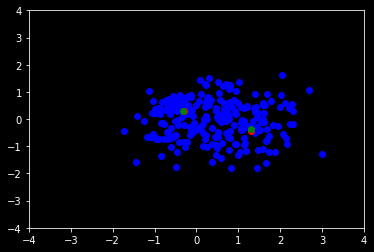

In [62]:
# %%
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

test_data = points
# whitening
test_data = test_data / np.std(test_data, axis=0)

hm_c = homemade_k_means(test_data, 2, 30, 1e-03)
scc = kmeans(test_data, 2, 30, 1e-03)

print(hm_c)
print(scc)
# %%

plt.scatter(points[:, 0], points[:, 1], c='b')
plt.scatter(hm_c[0][:, 0], hm_c[0][:, 1], c='r')
plt.scatter(scc[0][:, 0], scc[0][:, 1], c='g')  # %%
plt.style.use('dark_background')

## FUN


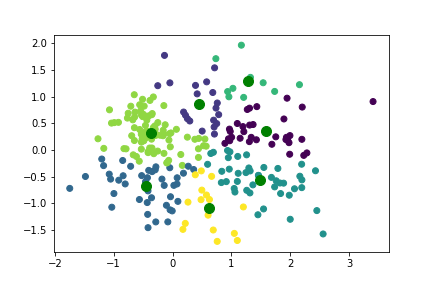
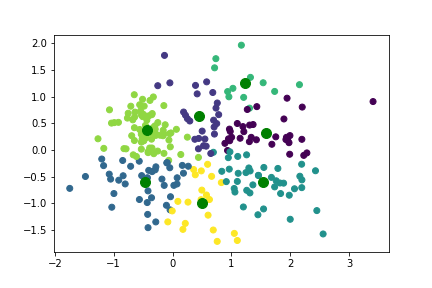
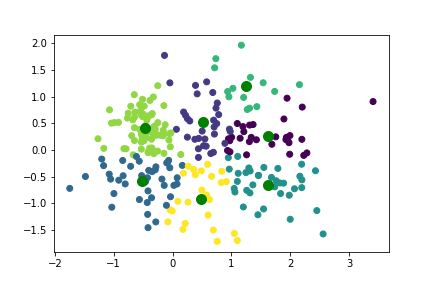
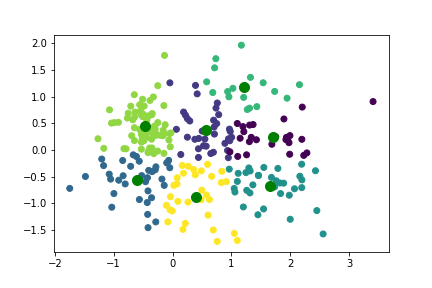
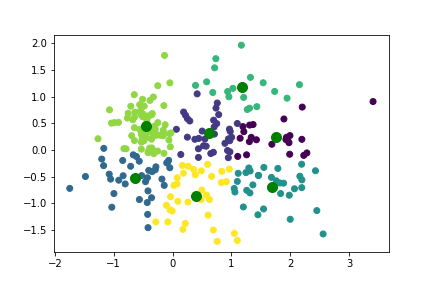
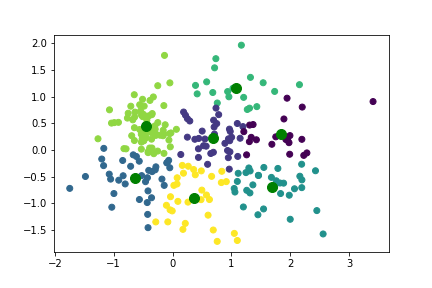
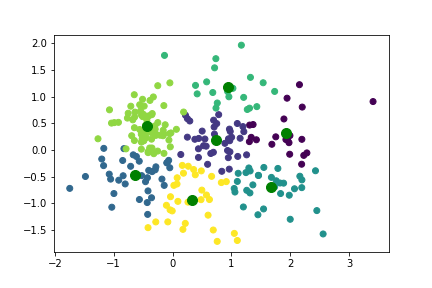
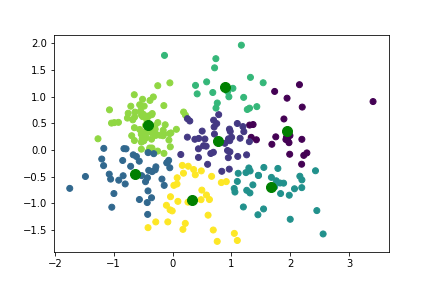
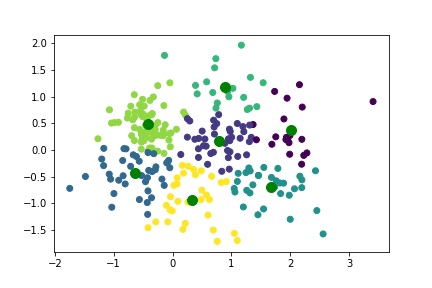
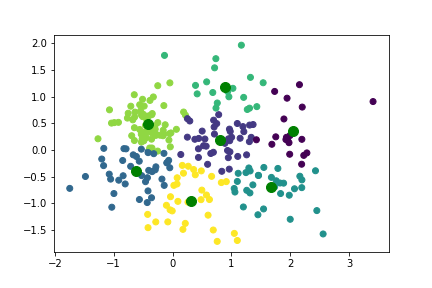
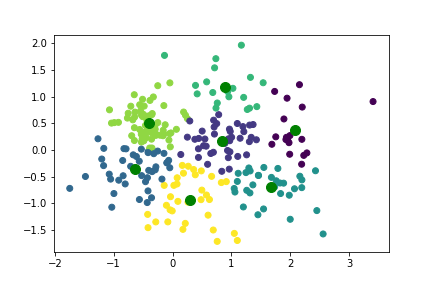
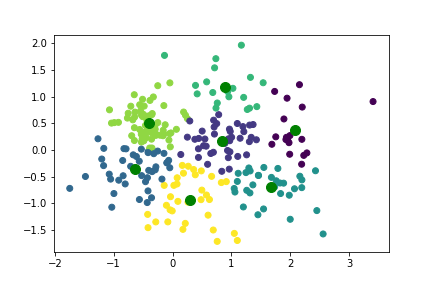
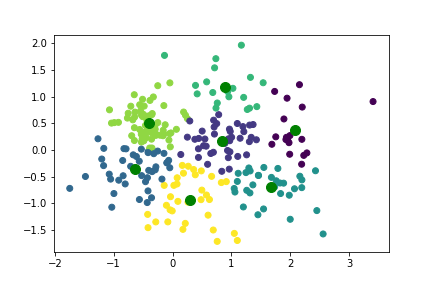
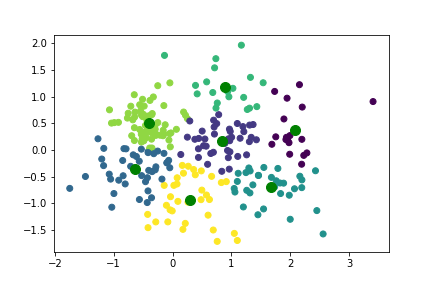
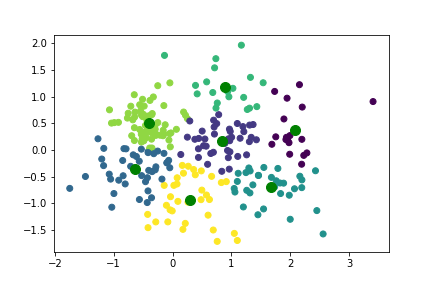
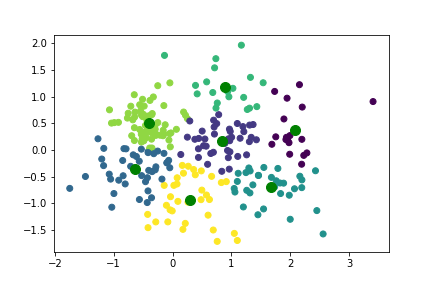
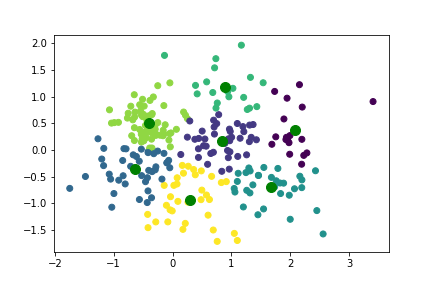
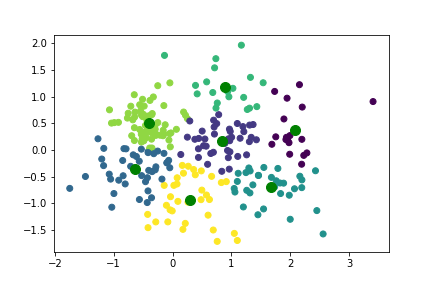
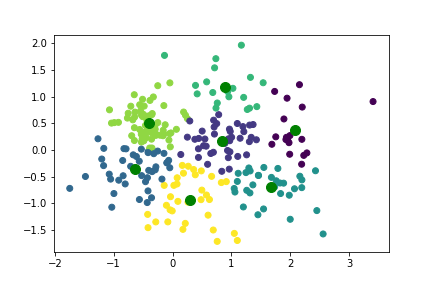
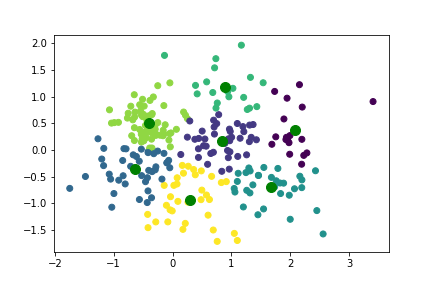
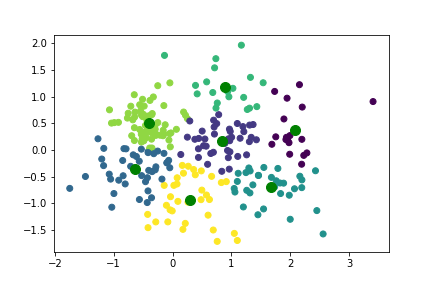
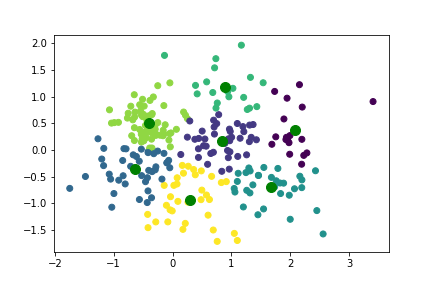
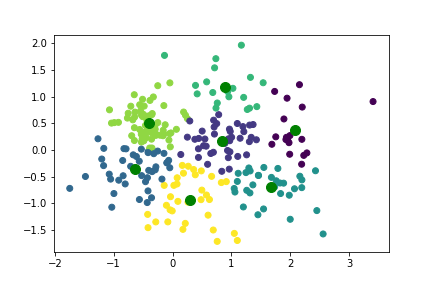
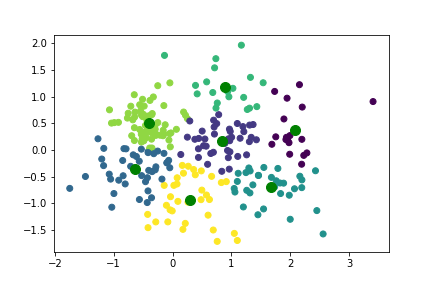
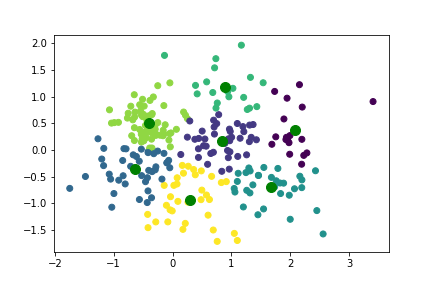
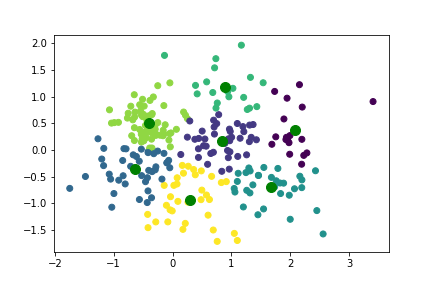
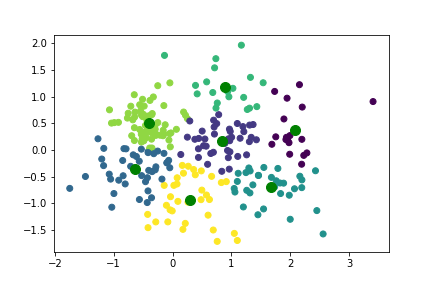
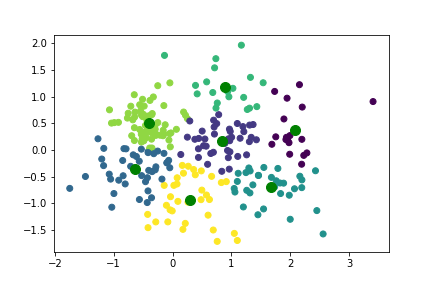
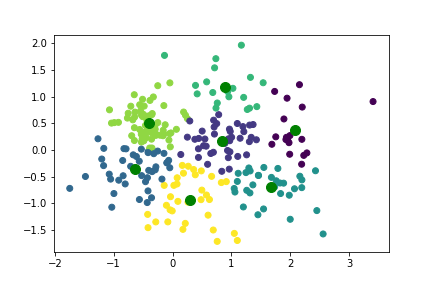
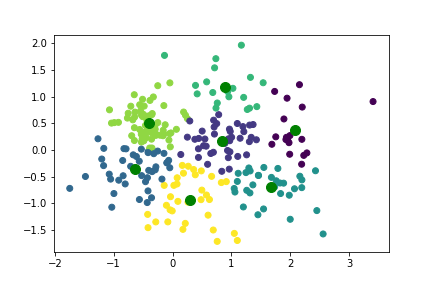

In [18]:
from JSAnimation import IPython_display
from matplotlib import animation

k=7

fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
# centroids = initialize_centroids(points, 7)
data = points
centroids = data
np.random.shuffle(centroids)
centroids = centroids[:k]
data = np.expand_dims(data, axis=1)
threshold = 1e-02
iter_ = 10
centroid_ret = []
def animate(i):
    global centroids
#     #find closest centroids 
#     closest = np.argmin(np.sqrt(
#             (np.sum((points - centroids[:, np.newaxis])**2, axis=2))), axis=0)
#     # calculate new centroids
#     centroids = np.array([points[closest == cent].mean(
#             axis=0) for cent in range(centroids.shape[0])])
#     dist = np.sqrt(
#             (np.sum((points - centroids[:, np.newaxis])**2, axis=2)).mean())

    closest = np.argmin(np.sqrt(
            (np.sum((data - centroids)**2, axis=2))), axis=1)
    # avoiding looping
    to_means = np.zeros((data.shape[0], k, data.shape[2]))
    # distance from points to the closest centroids
    dist = data - centroids
    # mean ~ {sum of distances centroid-point} / {number_of_points to a centroid -> (bincount)}
    to_means[np.arange(data.shape[0]), closest, :] = dist[np.arange(data.shape[0]),
                                                 closest, :] \
    / np.bincount(closest)[closest][:,np.newaxis] 
    centroids = centroids + to_means.sum(axis=0)
    
    distort = np.sqrt(
            (np.sum((to_means)**2, axis=2)).sum(axis=1).mean())
    
    if distort < threshold or iter_ > i:
        centroid_ret.append((centroids, distort))
        ax.cla()
        ax.scatter(points[:, 0], points[:, 1], c=closest)
        ax.scatter(centroids[:, 0], centroids[:, 1], c='g', s=100)
        return
    
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='g', s=100)
    return 

animation.FuncAnimation(fig, animate,
                        frames=30, interval=200, blit=False)